In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
%pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tvNieKk7mN2LSl8jizfe")
project = rf.workspace("sahrdaya").project("vehicle-detection-pxftz")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Vehicle-detection-3 in yolov8:: 100%|██████████| 7542/7542 [00:02<00:00, 3176.33it/s]


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 108MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Vehicle-detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1700413937.631dfab4a037.2104.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2850.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch2851.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch2852.jpg    weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


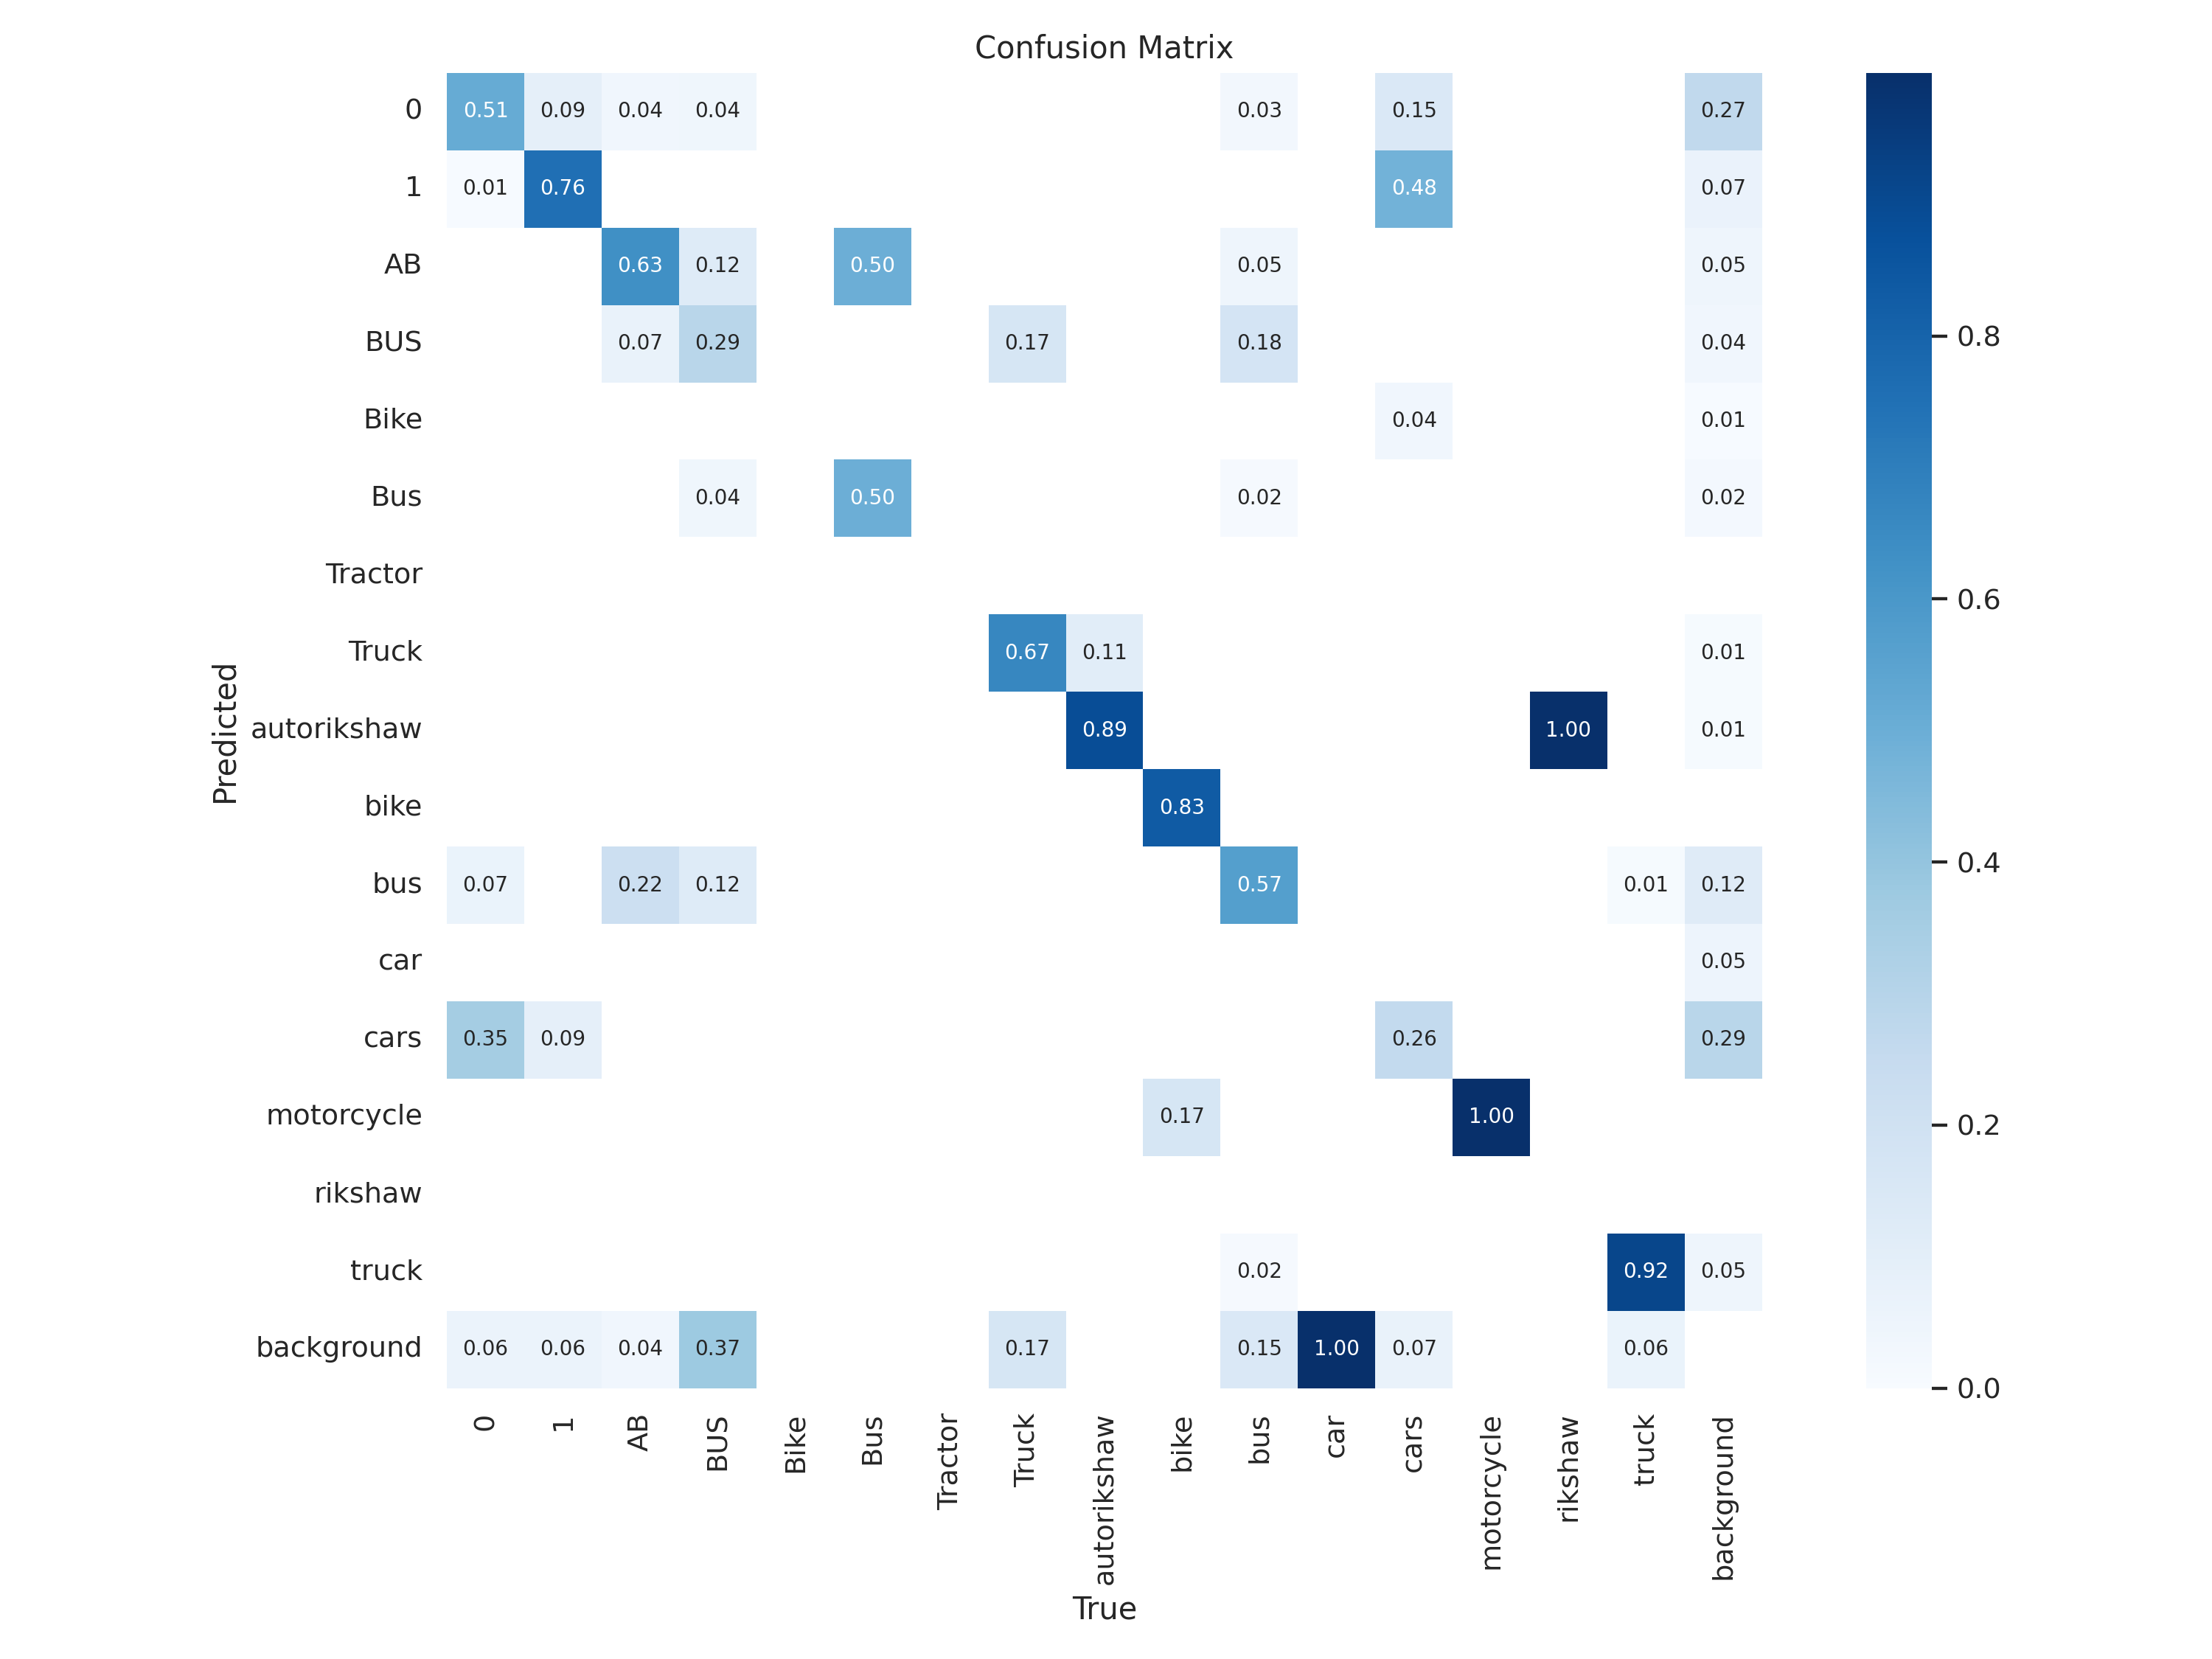

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\padve\AppData\Local\Temp\ipykernel_1432\1263442198.py:2: SyntaxWarning: invalid escape sequence '\F'
  image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\F1_curve.png'


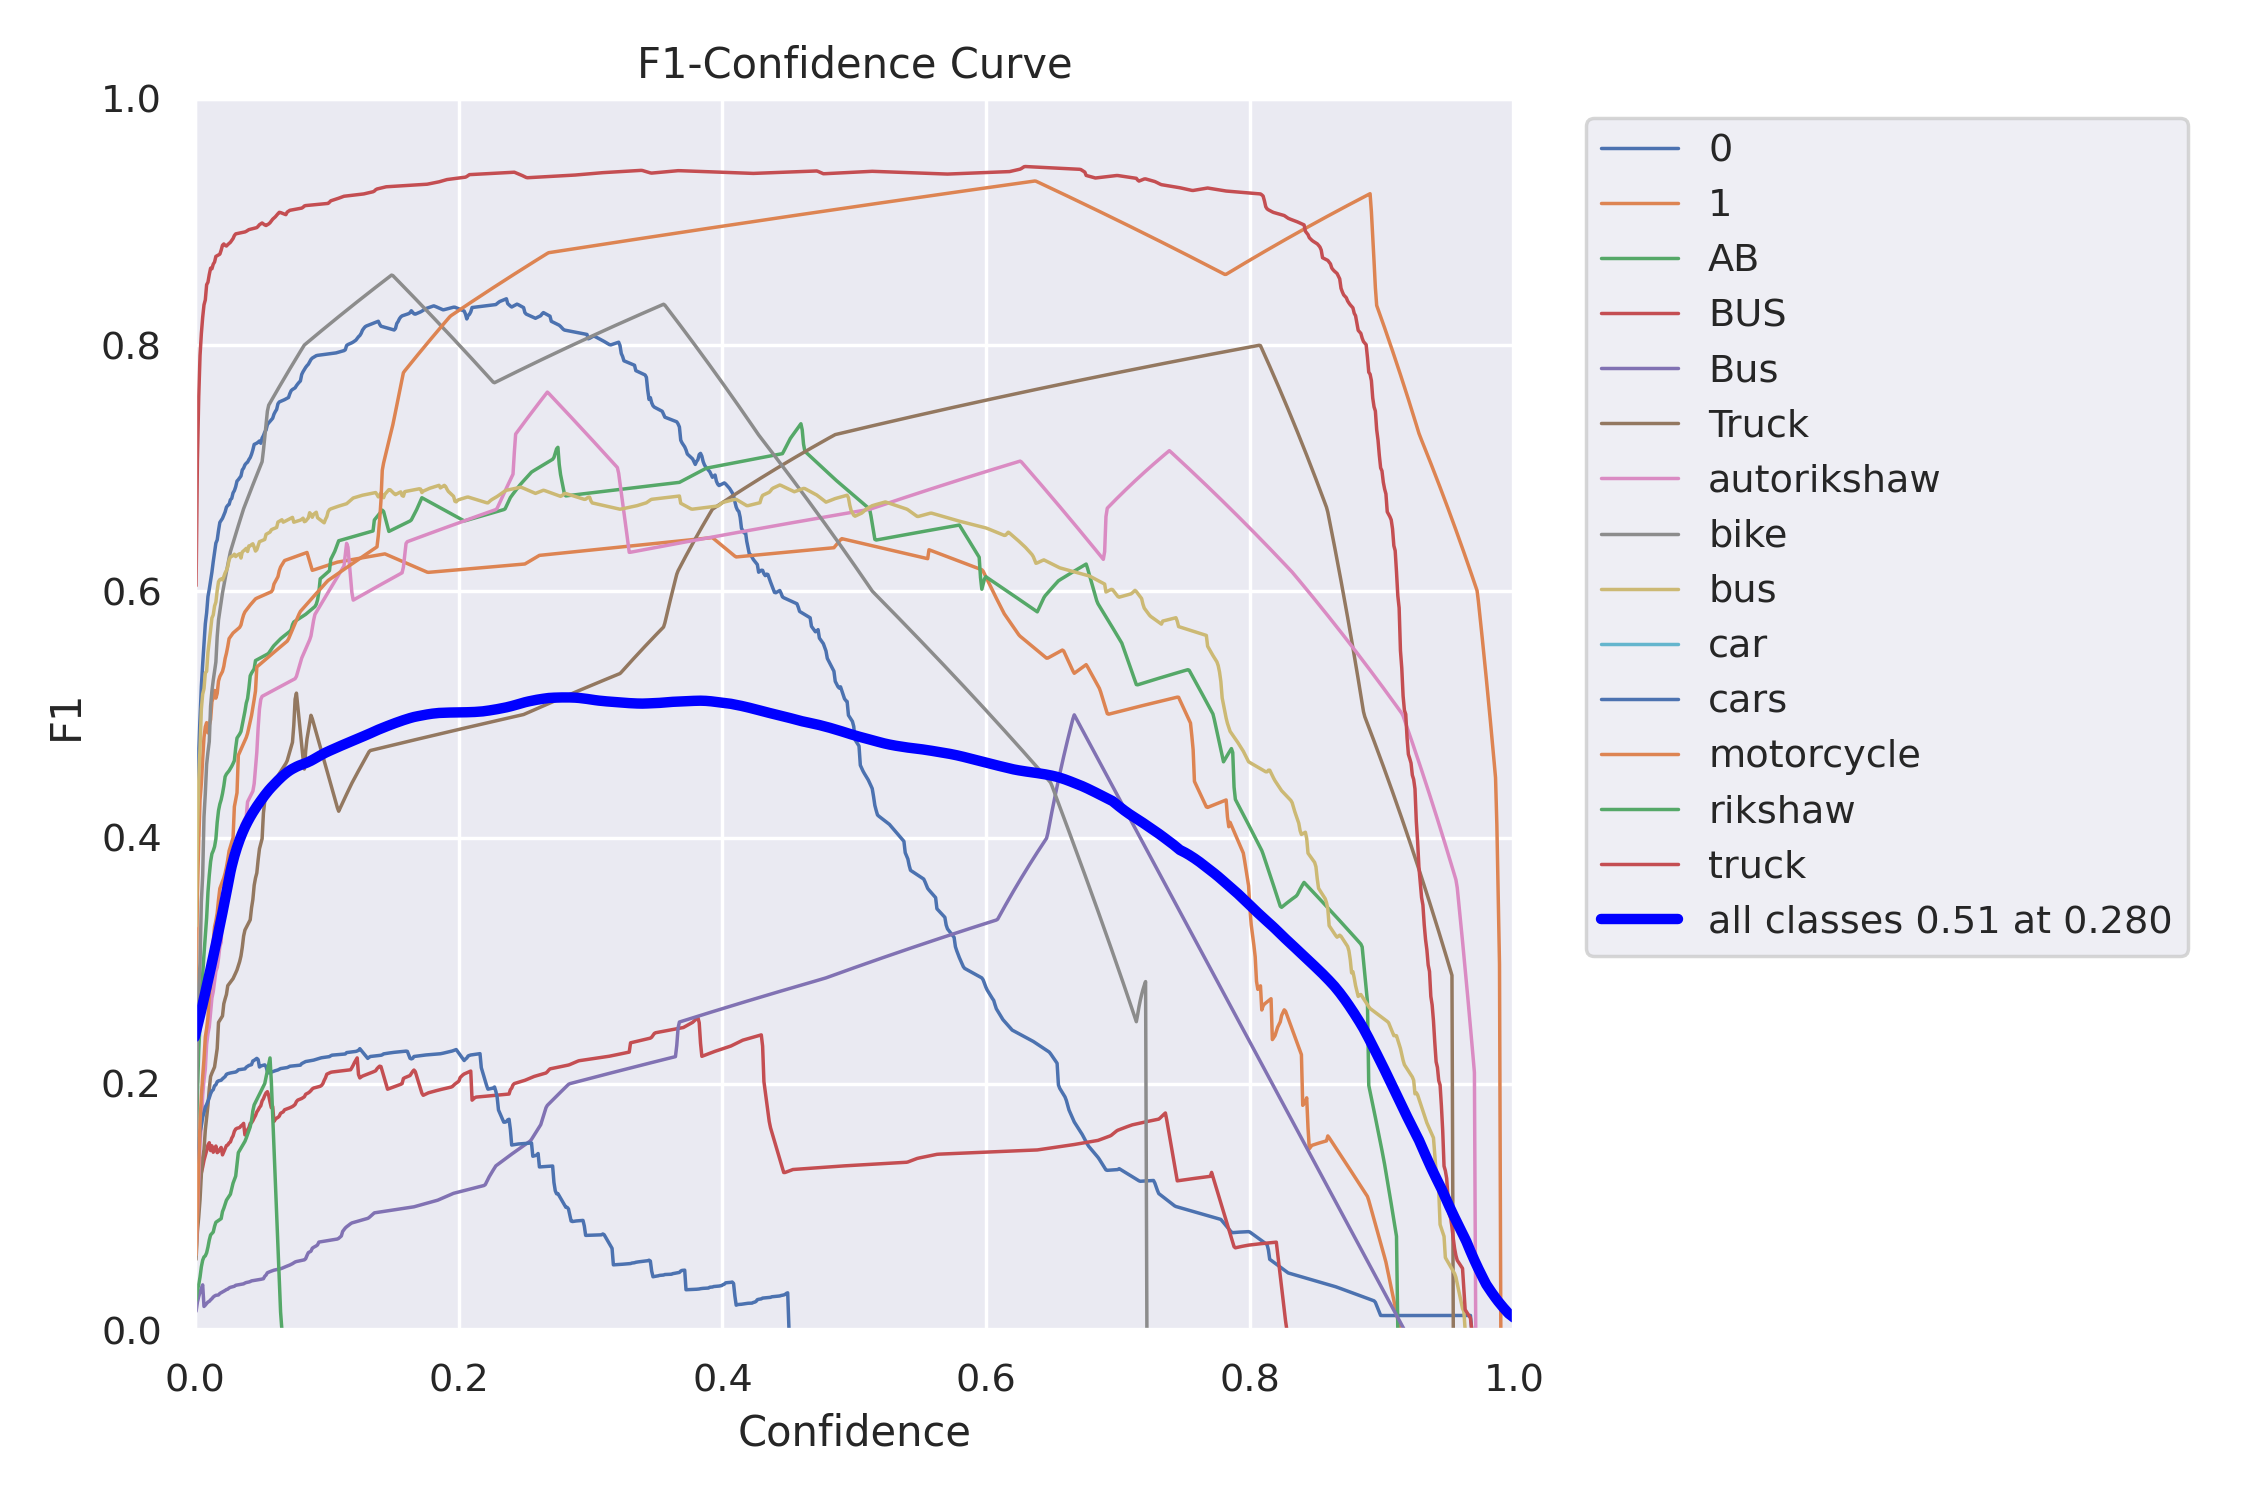

In [2]:
from IPython.display import Image
image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\F1_curve.png'
Image(filename=image_path, width=600)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\padve\AppData\Local\Temp\ipykernel_1432\405826530.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\P_curve.png'


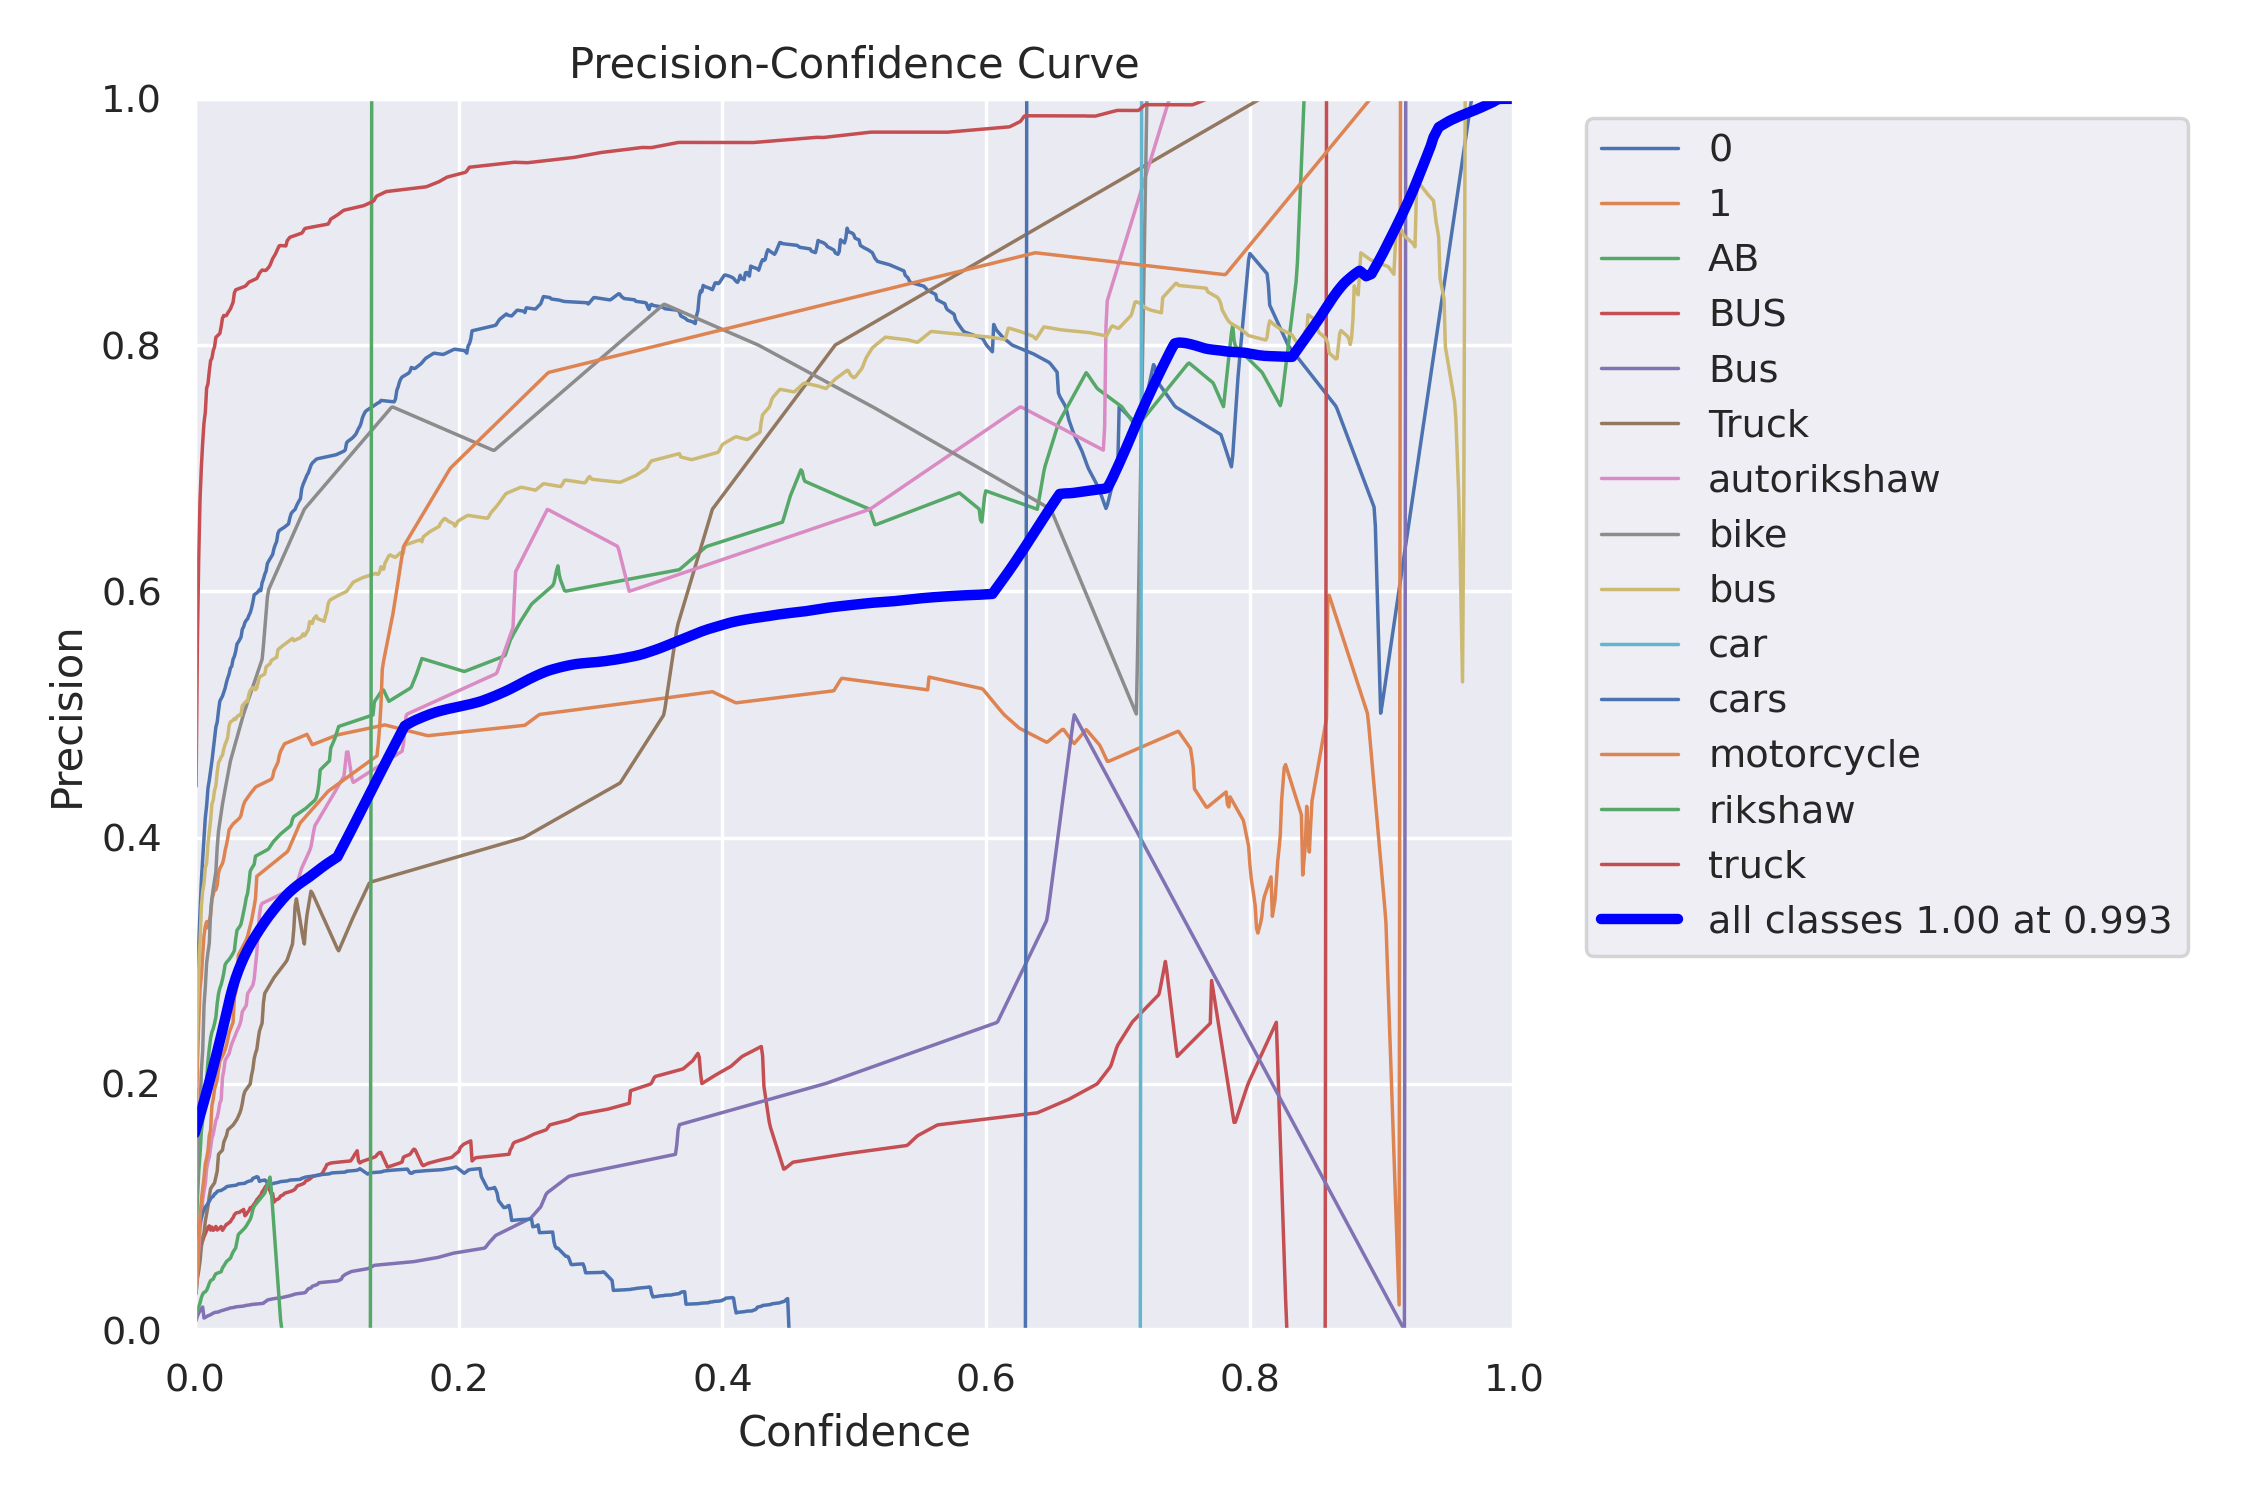

In [3]:
from IPython.display import Image
image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\P_curve.png'
Image(filename=image_path, width=600)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\padve\AppData\Local\Temp\ipykernel_1432\3781499063.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\PR_curve.png'


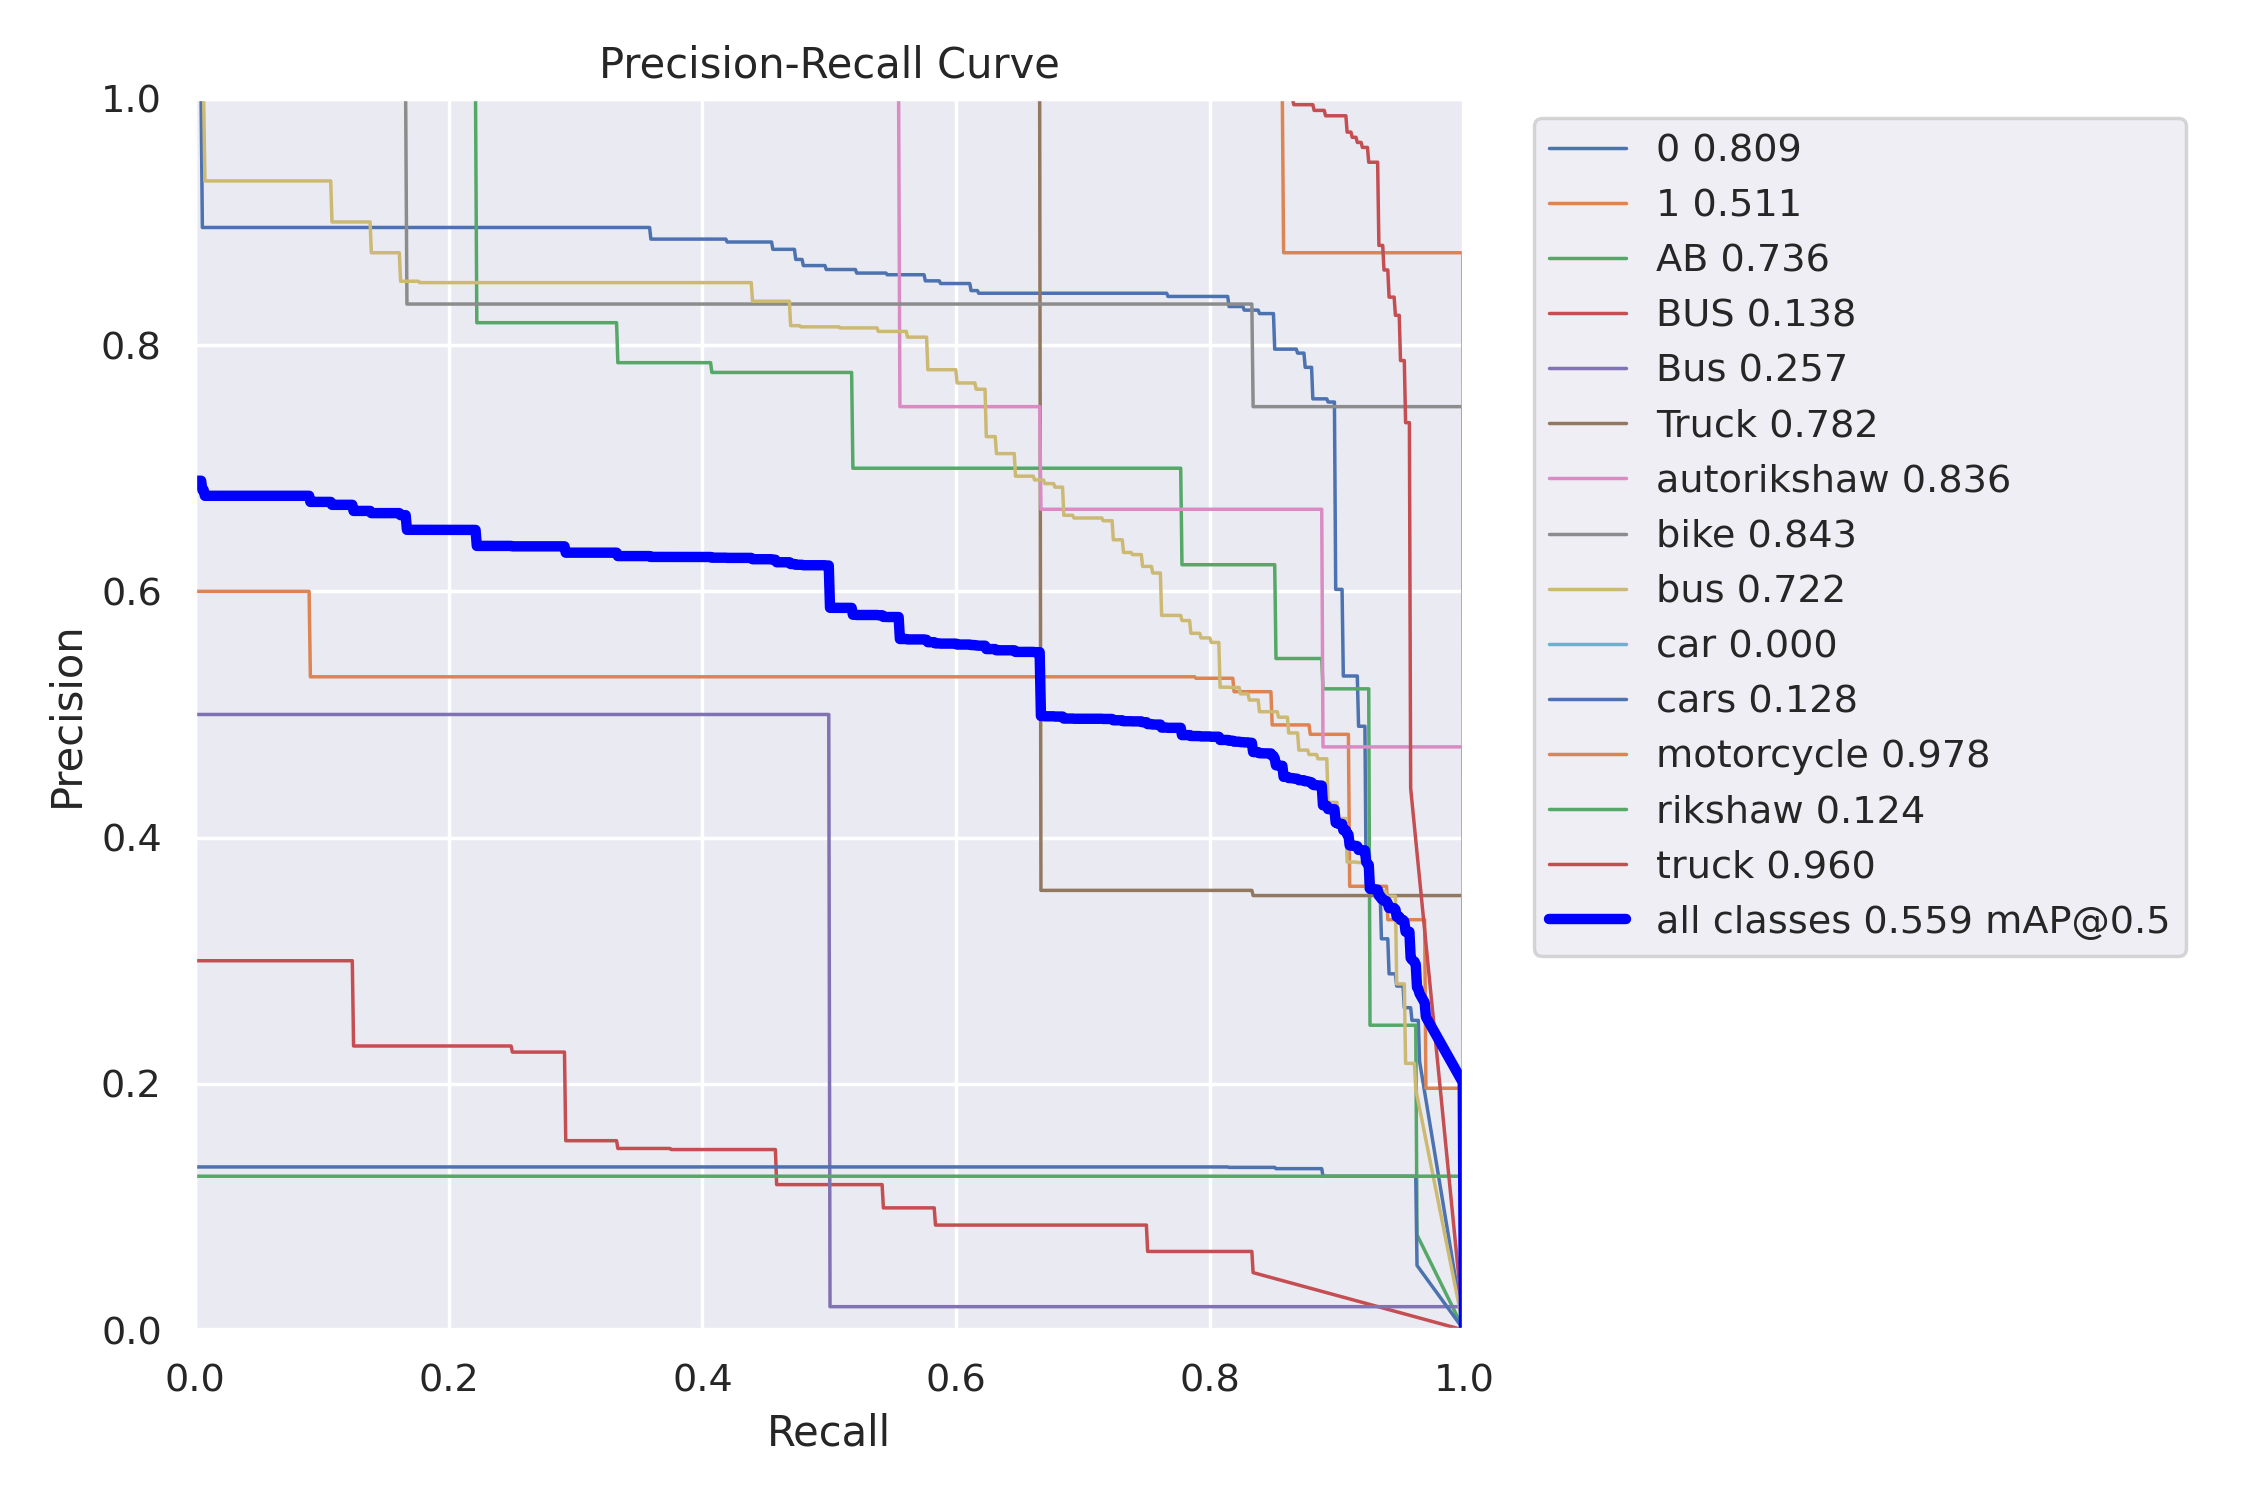

In [4]:
from IPython.display import Image
image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\PR_curve.png'
Image(filename=image_path, width=600)


<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\padve\AppData\Local\Temp\ipykernel_1432\863511957.py:2: SyntaxWarning: invalid escape sequence '\R'
  image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\R_curve.png'


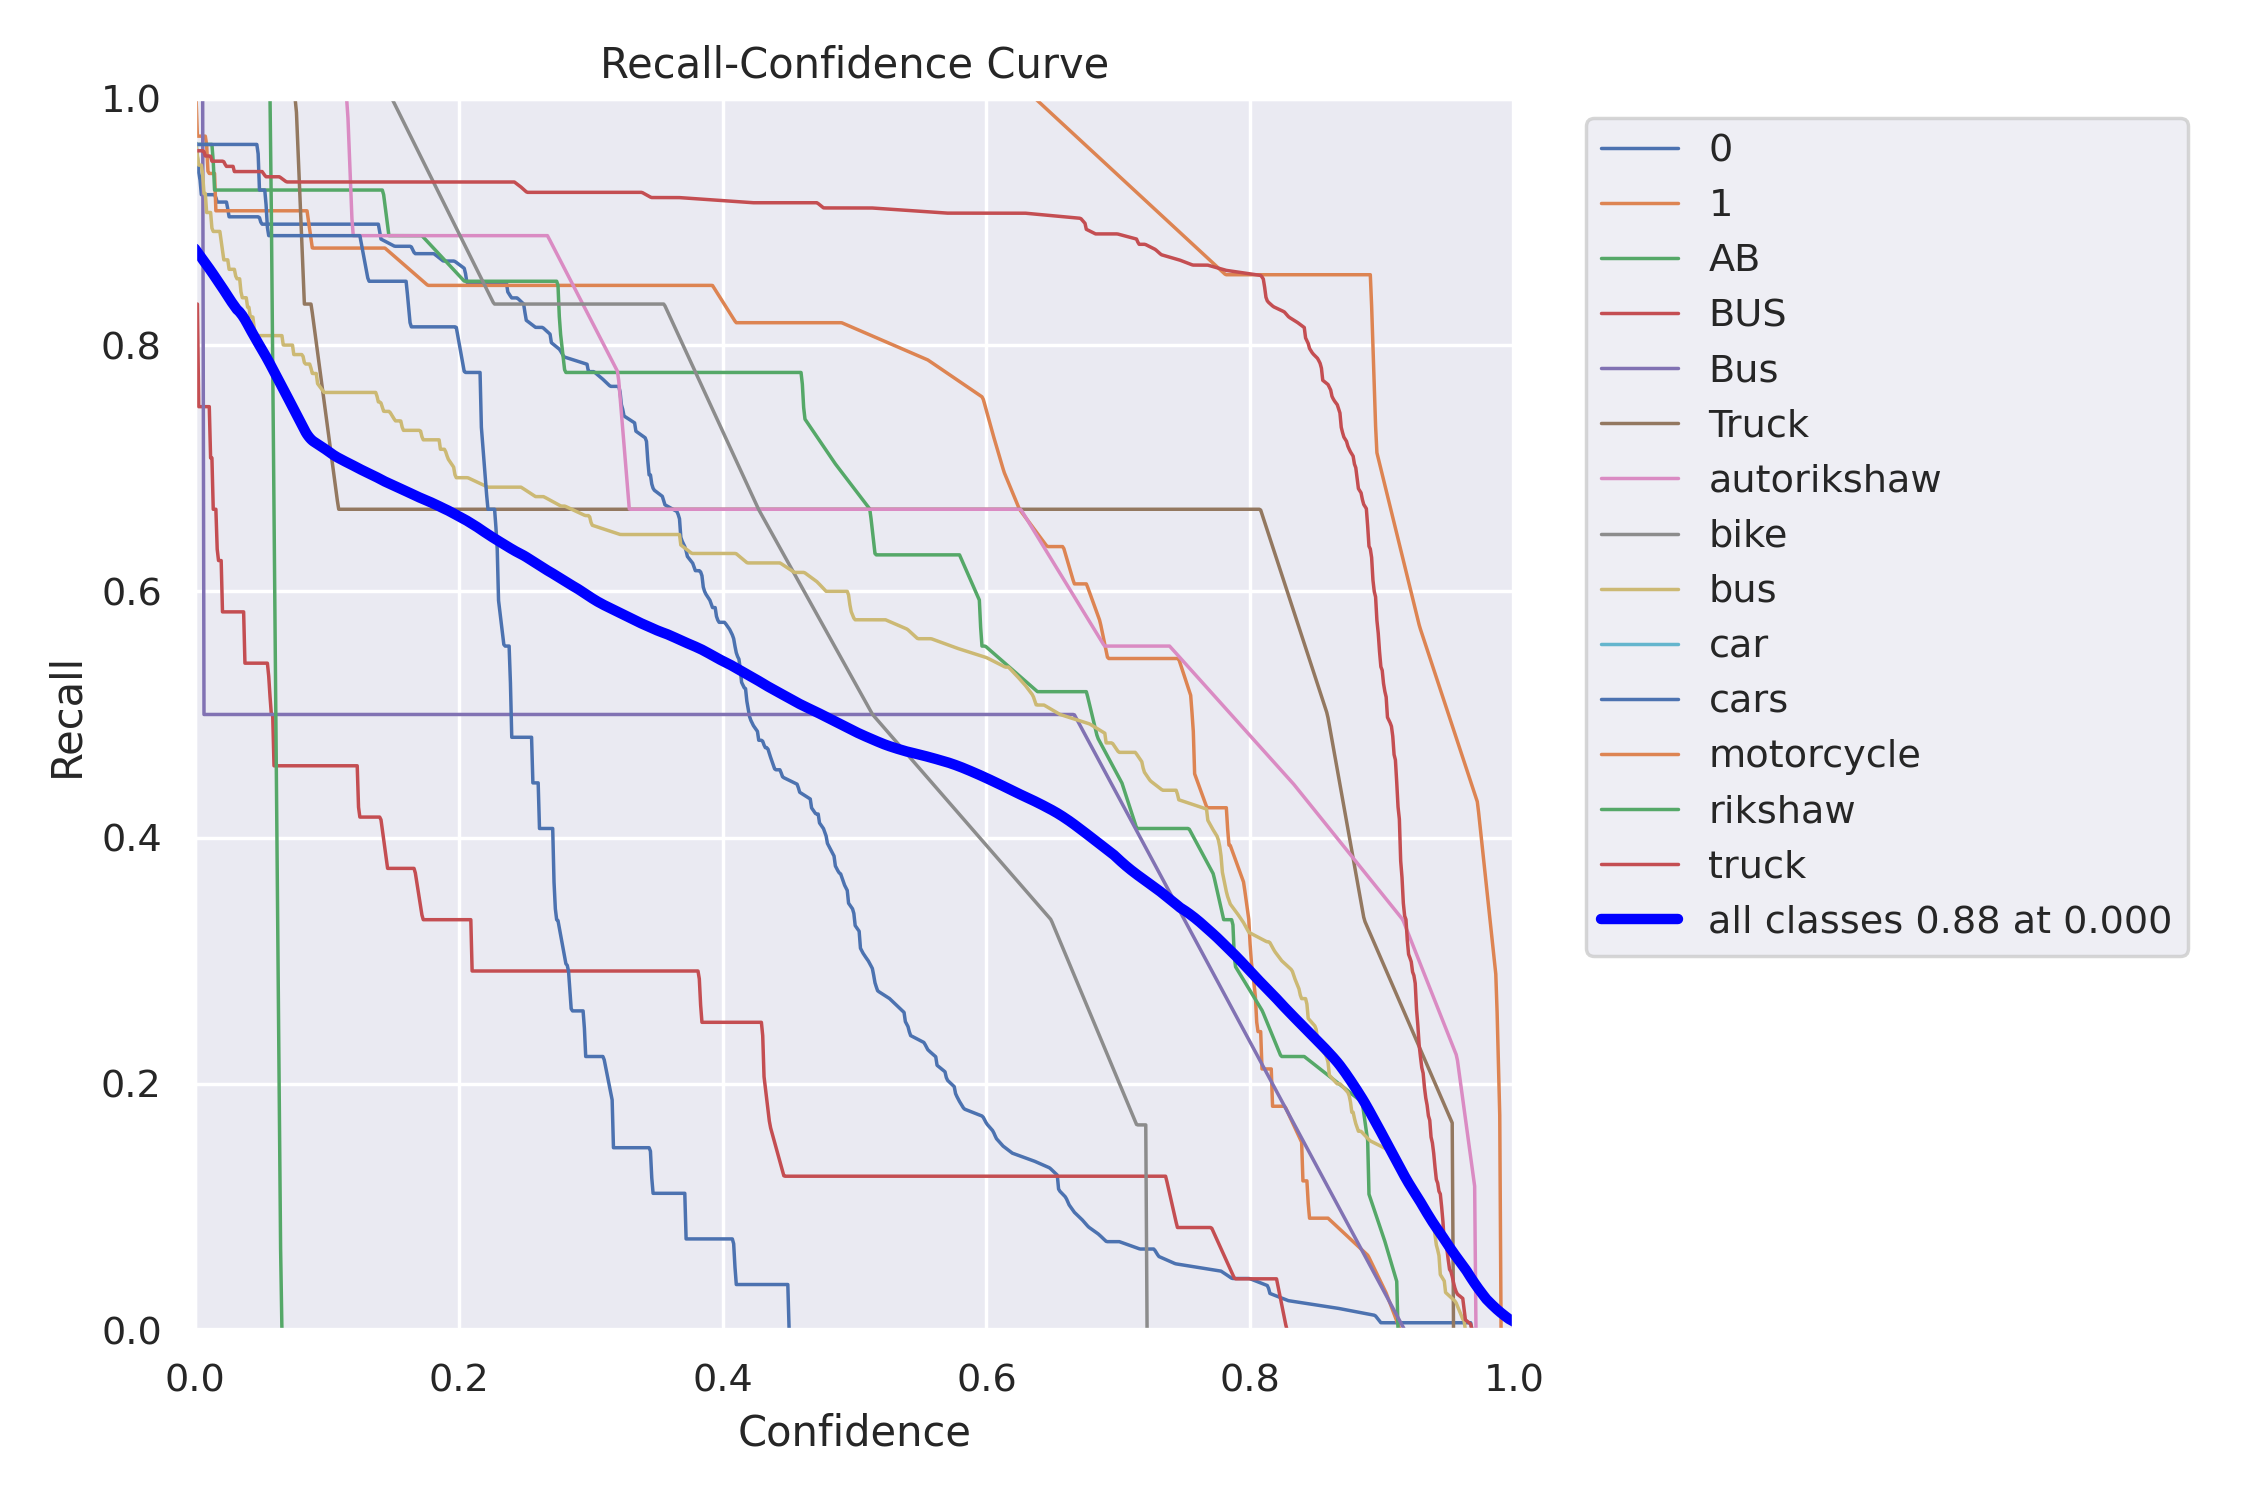

In [5]:
from IPython.display import Image
image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\R_curve.png'
Image(filename=image_path, width=600)


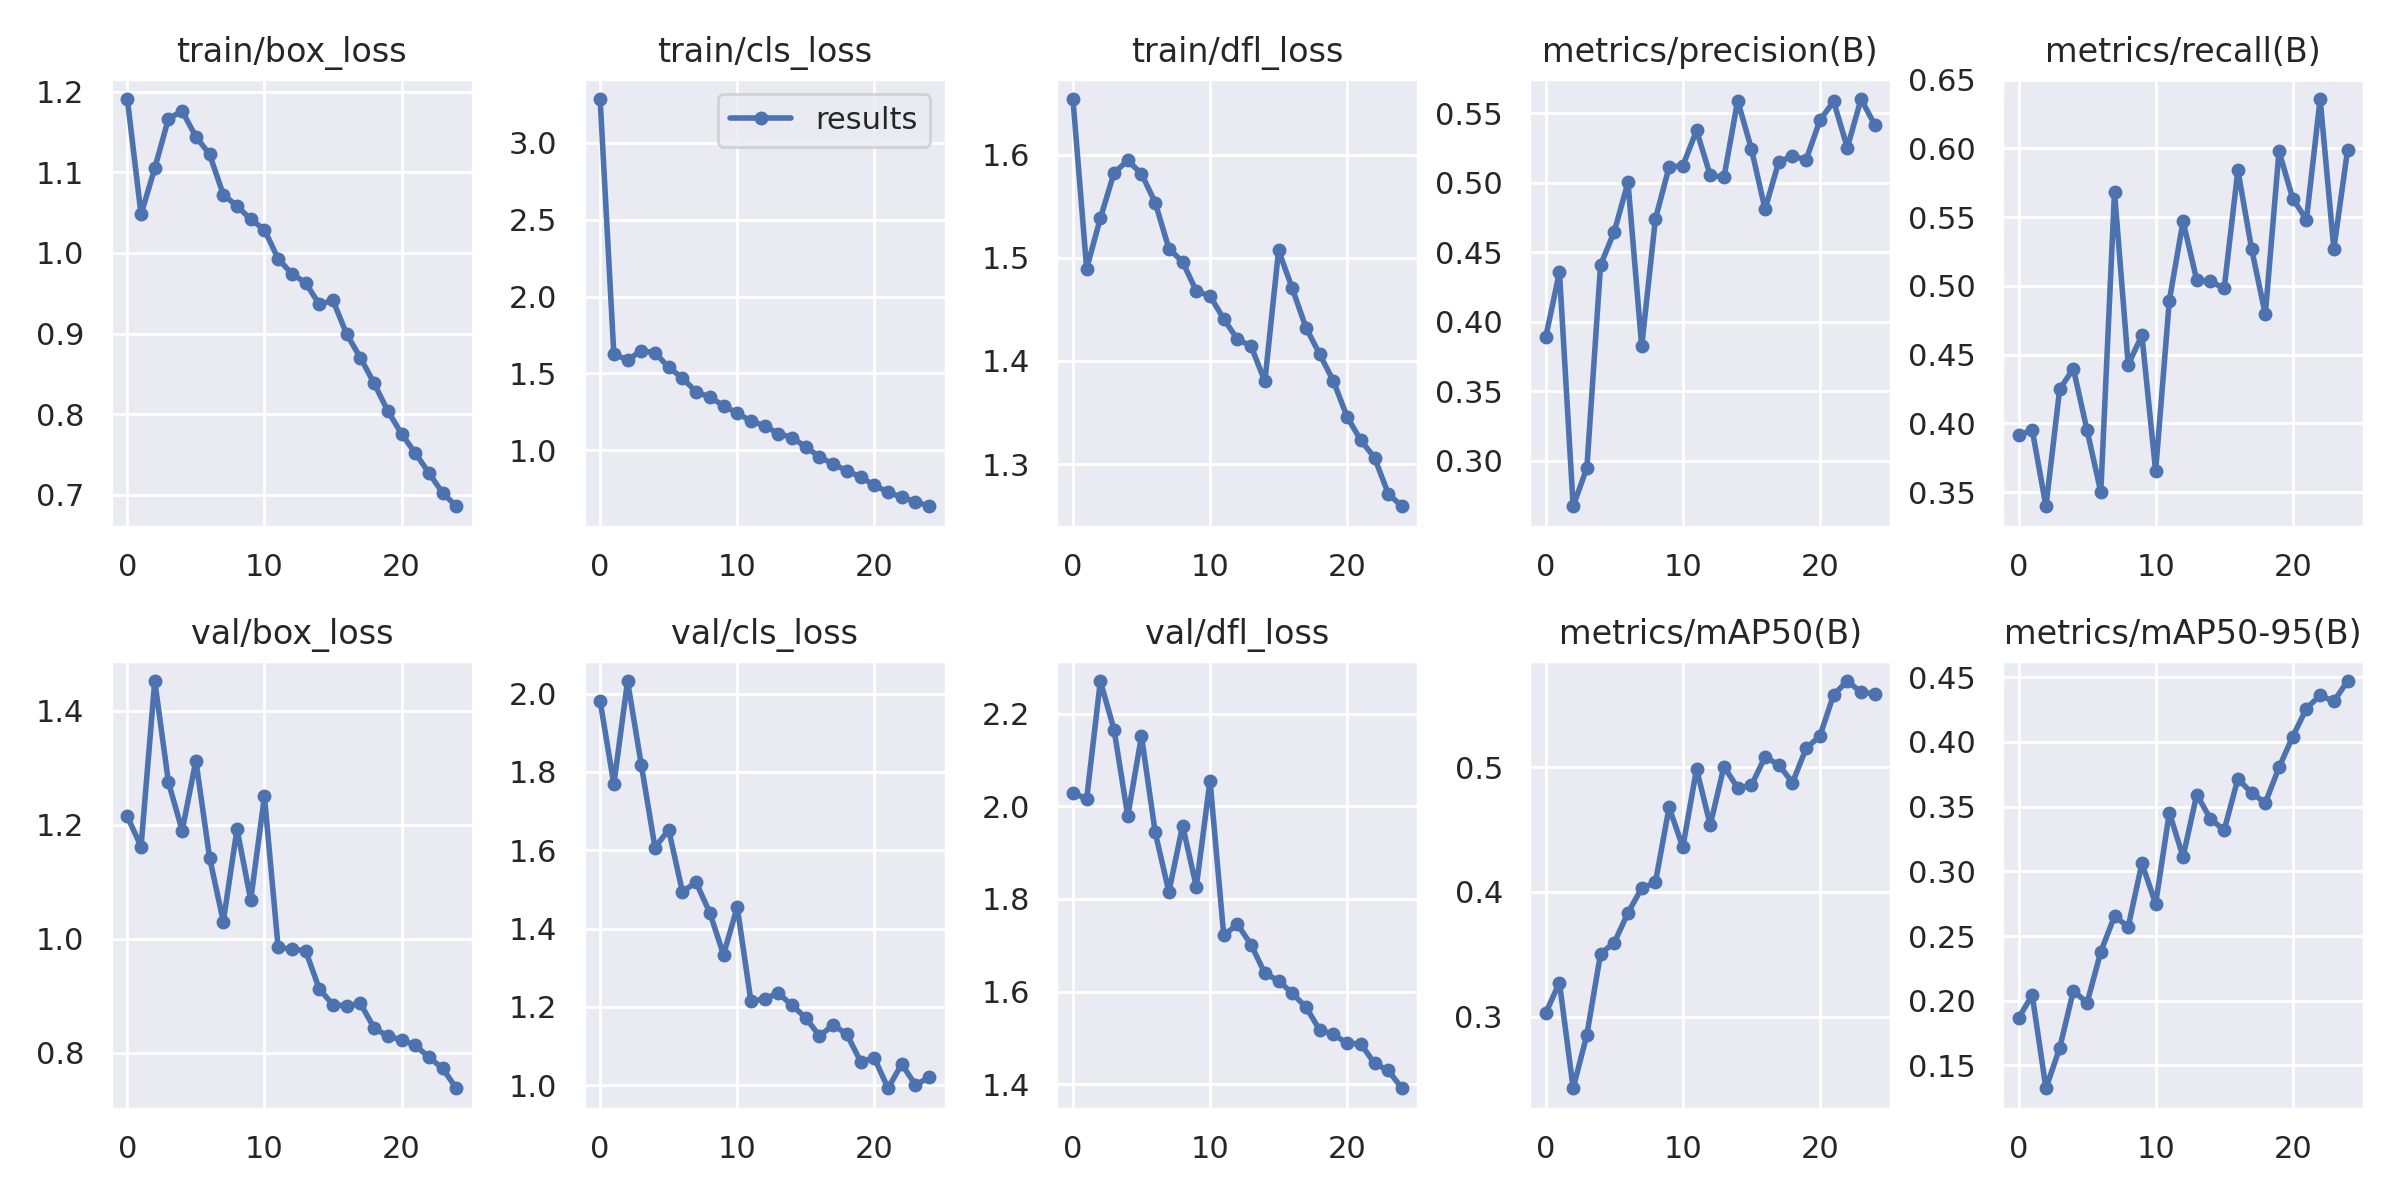

In [7]:
from IPython.display import Image
image_path = f'D:\\DeepSORT YOLOv8 Project\\runs\\detect\\train\\results.png'
Image(filename=image_path, width=600)
